Bar Plots

In [26]:
import sys
import os
import pandas as pd
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)
#from autoda.data_augmentation import ImageAugmentation
from fanova import fANOVA
from fanova import visualizer



sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [29]:

benchmarks = ["AlexNet","ResNet", "WideResNet"]

/mhome/negassim/AutoDA/notebooks/../../AutoData


Bar Plots for Hyperband Results on AlexNet

In [52]:
path = path_join(abspath("."), "..", "..", "AutoData")
print(path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

optimizers = ["hyperband", "BOHB"]
datasets = ["cifar10", "cifar100"]

hyperband = path_join(path, ("cifar10/hyperband"))
print(hyperband)
best_config  = []
standard = []
for d in datasets:
    p = dict()

    n_runs = 4
    for i in range(0, n_runs):
        try:
            from os.path import abspath, join as path_join
            best_config_path = "AlexNet/best_config_hyperband_%s_AlexNet_%d.json" % (d, i)
            filename = path_join(hyperband, best_config_path)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        best_config.append(res["best_run_info"]["info"]["validation_error"])
        try:
            from os.path import abspath, join as path_join
            standard_path = "AlexNet/standard/standard_hyperband_%s_%d.json" % (d, i)
            filename2 = path_join(hyperband, standard_path)
            with open(filename2, "r") as f:
                res2 = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        standard.append(res2["best_run_info"]["validation_error"])
print(standard)

/mhome/negassim/AutoDA/notebooks/../../AutoData
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/hyperband
0 cifar100
1 cifar100
2 cifar100
3 cifar100
[0.15169999999999995, 0.14780000000000004, 0.15439999999999998, 0.16169999999999995]


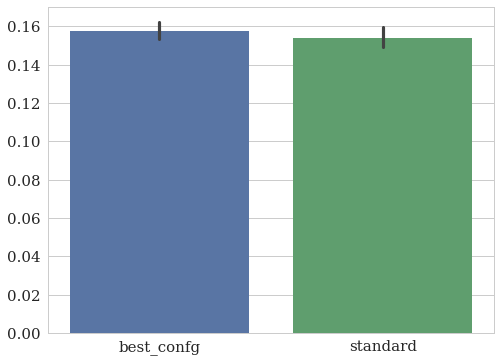

In [53]:
data = pd.DataFrame({"best_confg": best_config, "standard": standard})
ax = sns.barplot(data=data)

Model-based Hyperband results on cifar10 and AlexNet

In [59]:

   
path = path_join(abspath("."), "..", "..", "AutoData")
print(path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

optimizers = ["hyperband", "BOHB"]
datasets = ["cifar10", "cifar100"]

BOHB = path_join(path, ("cifar10/BOHB"))
print(hyperband)
best_config  = []
standard = []
for d in datasets:
    p = dict()

    n_runs = 5
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            best_config_path = "AlexNet/best_config_hyperband_%s_%d.json" % (d, i)
            filename = path_join(BOHB, best_config_path)
            print(filename)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        best_config.append(res["best_run_info"]["info"]["validation_error"])
        try:
            from os.path import abspath, join as path_join
            standard_path = "AlexNet/standard/standard_hyperband_%s_%d.json" % (d, i)
            filename2 = path_join(BOHB, standard_path)
            with open(filename2, "r") as f:
                res2 = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        standard.append(res2["best_run_info"]["validation_error"])
print(standard)

/mhome/negassim/AutoDA/notebooks/../../AutoData
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/hyperband
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_1.json
1 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_2.json
2 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_3.json
3 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_4.json
4 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar100_1.json
1 cifar100
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar100_2.json
2 cifar100
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar100_3.json
3 cifar100
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet